# Decision Tree

## Imports

In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier

## Preprocessing

### Loading Dataset

In [2]:
filePath = "bank-additional\\bank-additional\\bank-additional-full.csv"
data = pd.read_csv(filePath, sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Encoding Categorical Variables
Transforming non-numeric labels into numeric labels.

In [3]:
categorical_label_encoder = LabelEncoder()

for variable in data.select_dtypes(include=["object"]).columns:
    data[variable] = categorical_label_encoder.fit_transform(data[variable])

### Seperating Features and the Target
Seperating/Dropping the target variable (AKA the output variable) from the features (input variables). This is done because the model the target variable itself isn't used to train the model, instead the features are to train the model in order to predict the target variable; therefore, to prevent the model from learning incorrect patterns and because the model is evaluated on the target variable, it is necessary to drop the target variable.

In [4]:
features = data.drop("y", axis=1)
target = data["y"]

### Train Test Split
A dataset is split into two parts, the training dataset and the testing dataset. This done so a model can be tested/evaluated after training it, without testing the model, it won't be possbile to find out whether a it is underfitted or overfitted (Bias-Variance Tradeoff).

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, test_size=0.2, random_state=42)

## Creating the Decision Tree Model

In [6]:
random_forest_model = RandomForestClassifier()

## Training the Decision Tree Model

In [7]:
trained_random_forest = random_forest_model.fit(X_train, y_train)

## Testing the Decision Tree Model

In [8]:
training_predictions = (random_forest_model.predict(X_train) > 0.5).astype("int32")
testing_predictions = (random_forest_model.predict(X_test) > 0.5).astype("int32")

### Accuracy Score

In [9]:
model_accuracy_score_training = accuracy_score(y_train, training_predictions)
model_accuracy_score_testing = accuracy_score(y_test, testing_predictions)
print("Training Accuracy: ", model_accuracy_score_training)
print("Testing Accuracy: ", model_accuracy_score_testing)

Training Accuracy:  1.0
Testing Accuracy:  0.9130857004127215


### Confusion Matrix

[[7030  273]
 [ 443  492]]


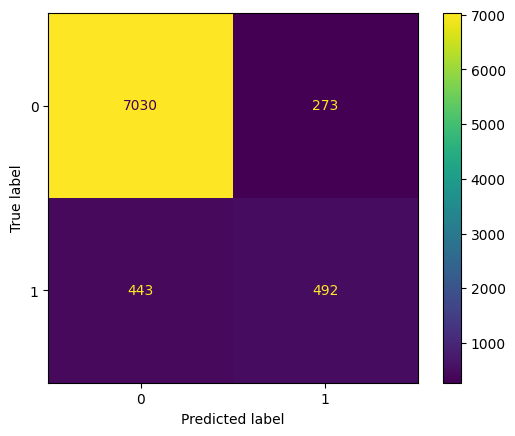

In [10]:
model_confusion_matrix = confusion_matrix(y_test, testing_predictions)
print(model_confusion_matrix)
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=model_confusion_matrix)
confusion_matrix_display.plot()
plt.show()

### Classification Report
Since the dataset is an imbalanced dataset, the model will perform less efficiently on the minority class of "1" than the majority class of "0", causing the low precision, recall and f1-score despire having a high accuracy overall.

In [11]:
model_classification_report = classification_report(y_test, testing_predictions)
print(model_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.53      0.58       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



## Improving the Model

### Class Weights
A method of dealing with class imbalance is the use of class weights, by assigning a greater class weight to the minority class and a lesser class weight the majority class, it reduces bias towards the majority class that arises from its higher support.

In [12]:
weighted_random_forest_model = RandomForestClassifier(class_weight={0: 50, 1: 1})

trained_weighted_random_forest = weighted_random_forest_model.fit(X_train, y_train)

weighted_training_predictions = (weighted_random_forest_model.predict(X_train)).astype("int32")
weighted_testing_predictions = (weighted_random_forest_model.predict(X_test)).astype("int32")


#### Accuracy Score

In [13]:
weighted_model_accuracy_score_training = accuracy_score(y_train, weighted_training_predictions)
weighted_model_accuracy_score_testing = accuracy_score(y_test, weighted_testing_predictions)
print("Training Accuracy: ", weighted_model_accuracy_score_training)
print("Testing Accuracy: ", weighted_model_accuracy_score_testing)

Training Accuracy:  1.0
Testing Accuracy:  0.9106579266812334


#### Confusion Matrix

[[7030  273]
 [ 443  492]]


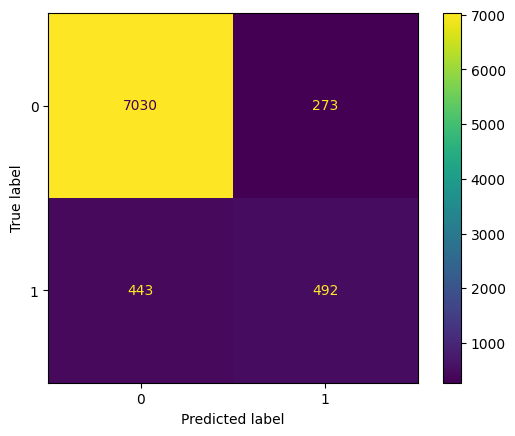

In [14]:
weighted_model_confusion_matrix = confusion_matrix(y_test, testing_predictions)
print(weighted_model_confusion_matrix)
weighted_confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=weighted_model_confusion_matrix)
weighted_confusion_matrix_display.plot()
plt.show()

#### Classification Report

In [15]:
weighted_model_classification_report = classification_report(y_test, weighted_testing_predictions)

print("Classification report for the weighted model")
print(weighted_model_classification_report)
print("\nClassification report for the unweighted model")
print(model_classification_report)

Classification report for the weighted model
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.62      0.55      0.58       935

    accuracy                           0.91      8238
   macro avg       0.78      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238


Classification report for the unweighted model
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.53      0.58       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



#### Conclusion class weights
The purpose behind implementing class weights in the model was to improve performance for the minority class, however as seen by the two classification reports, the weighted model has worse recall and f1-score for the minority class.

### SMOTE
SMOTE is an oversampling technique that is used in medium to large imbalanced datasets in order to learn important patterns in a minority class and to mitigate the bias caused by the large support for the majority class.

In [16]:
smote = SMOTE(random_state=42)

oversampled_X_train, oversampled_y_train = smote.fit_resample(X_train, y_train)

trained_oversampled_neural_network = weighted_random_forest_model.fit(oversampled_X_train, oversampled_y_train)

oversampled_training_predictions = (weighted_random_forest_model.predict(X_train) > 0.5).astype("int32")
oversampled_testing_predictions = (weighted_random_forest_model.predict(X_test) > 0.5).astype("int32")

#### Accuracy Score

In [17]:
oversampled_training_accuracy_score = accuracy_score(y_train, oversampled_training_predictions)
oversampled_testing_accuracy_score = accuracy_score(y_test, oversampled_testing_predictions)
print("Training Accuracy: ", oversampled_training_accuracy_score)
print("Testing Accuracy: ", oversampled_testing_accuracy_score)

Training Accuracy:  1.0
Testing Accuracy:  0.9047098810390871


#### Confusion Matrix

[[6771  532]
 [ 253  682]]


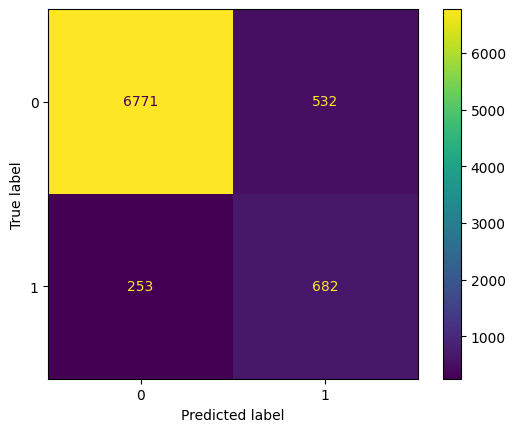

In [18]:
oversampled_confusion_matrix = confusion_matrix(y_test, oversampled_testing_predictions)
print(oversampled_confusion_matrix)
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=oversampled_confusion_matrix)
confusion_matrix_display.plot()
plt.show()

#### Classification Report

In [19]:
oversampled_classification_report = classification_report(y_test, oversampled_testing_predictions)
print(oversampled_classification_report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7303
           1       0.56      0.73      0.63       935

    accuracy                           0.90      8238
   macro avg       0.76      0.83      0.79      8238
weighted avg       0.92      0.90      0.91      8238



### Hyperparameter Optimization

In [20]:
param_grid = {'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 500, num = 2)],
'max_features' : [None, 'log2', 'sqrt'],
'bootstrap' : [True, False]
}
print(param_grid)

{'n_estimators': [100, 500], 'max_features': [None, 'log2', 'sqrt'], 'bootstrap': [True, False]}


In [21]:
pre_optimized_random_forest_model = RandomForestClassifier()
random_forest_grid = GridSearchCV(estimator = pre_optimized_random_forest_model, param_grid = param_grid, verbose = 2, n_jobs = -1)

random_forest_grid.fit(X_train, y_train)
random_forest_grid.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'bootstrap': True, 'max_features': 'log2', 'n_estimators': 500}

In [37]:
optimized_random_forest_model = RandomForestClassifier(class_weight={0: 50, 1: 1}, bootstrap=True, max_features='log2', n_estimators=500)

trained_optimized_random_forest_model = optimized_random_forest_model.fit(oversampled_X_train, oversampled_y_train)

optimized_training_predictions = (optimized_random_forest_model.predict(X_train)).astype("int32")
optimized_testing_predictions = (optimized_random_forest_model.predict(X_test)).astype("int32")

print(classification_report(y_test, optimized_testing_predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7303
           1       0.55      0.73      0.63       935

    accuracy                           0.90      8238
   macro avg       0.76      0.83      0.79      8238
weighted avg       0.92      0.90      0.91      8238



### Hybrid Sampling

In [38]:
smote_een = SMOTEENN(random_state=42)
hybrid_X_train, hybrid_y_train = smote_een.fit_resample(X_train, y_train)

trained_hybrid_random_forest_model = optimized_random_forest_model.fit(hybrid_X_train, hybrid_y_train)

hybrid_training_predictions = (optimized_random_forest_model.predict(X_train) > 0.5).astype("int32")
hybrid_testing_predictions = (optimized_random_forest_model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, hybrid_testing_predictions))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7303
           1       0.48      0.89      0.62       935

    accuracy                           0.88      8238
   macro avg       0.73      0.88      0.77      8238
weighted avg       0.93      0.88      0.89      8238



### Balanced Random Forest Classifier

In [41]:
balanced_random_forest_model = BalancedRandomForestClassifier(random_state=42)
balanced_random_forest_model.fit(X_train, y_train)
balanced_testing_predictions = (balanced_random_forest_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, balanced_testing_predictions))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      7303
           1       0.46      0.90      0.61       935

    accuracy                           0.87      8238
   macro avg       0.72      0.88      0.77      8238
weighted avg       0.93      0.87      0.89      8238

